In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

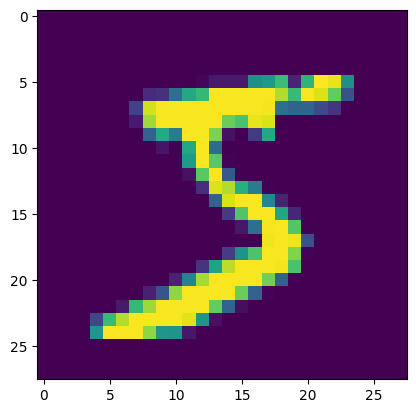

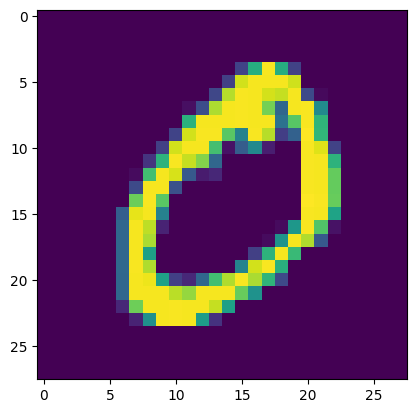

In [4]:
import matplotlib.pyplot as plt

# X_train is a NumPy array containing images
for i in range(2):
    plt.imshow(X_train[i])
    plt.show()


In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['mse', 'accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=24, validation_split=0.15)


Epoch 1/24
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2716 - mse: 27.3607 - accuracy: 0.9190 - val_loss: 0.1221 - val_mse: 27.4975 - val_accuracy: 0.9649
Epoch 2/24
1594/1594 [==============================] - 4s 2ms/step - loss: 0.1119 - mse: 27.3695 - accuracy: 0.9666 - val_loss: 0.1085 - val_mse: 27.4992 - val_accuracy: 0.9671
Epoch 3/24
1594/1594 [==============================] - 4s 2ms/step - loss: 0.0775 - mse: 27.3713 - accuracy: 0.9758 - val_loss: 0.0937 - val_mse: 27.5004 - val_accuracy: 0.9722
Epoch 4/24
1594/1594 [==============================] - 4s 2ms/step - loss: 0.0604 - mse: 27.3722 - accuracy: 0.9808 - val_loss: 0.0856 - val_mse: 27.5012 - val_accuracy: 0.9752
Epoch 5/24
1594/1594 [==============================] - 4s 2ms/step - loss: 0.0488 - mse: 27.3728 - accuracy: 0.9847 - val_loss: 0.0867 - val_mse: 27.5014 - val_accuracy: 0.9763
Epoch 6/24
1594/1594 [==============================] - 4s 2ms/step - loss: 0.0395 - mse: 27.3732 - accuracy: 

In [10]:
y_pred=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [11]:
print(y_test[:30])
print(y_pred[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [12]:
# Evaluate the model on the test set
test_loss, test_mse, test_accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 27.3394 - accuracy: 0.9800
Test Loss: 0.1164
Test Mean Squared Error: 27.3394
Test Accuracy: 98.00%


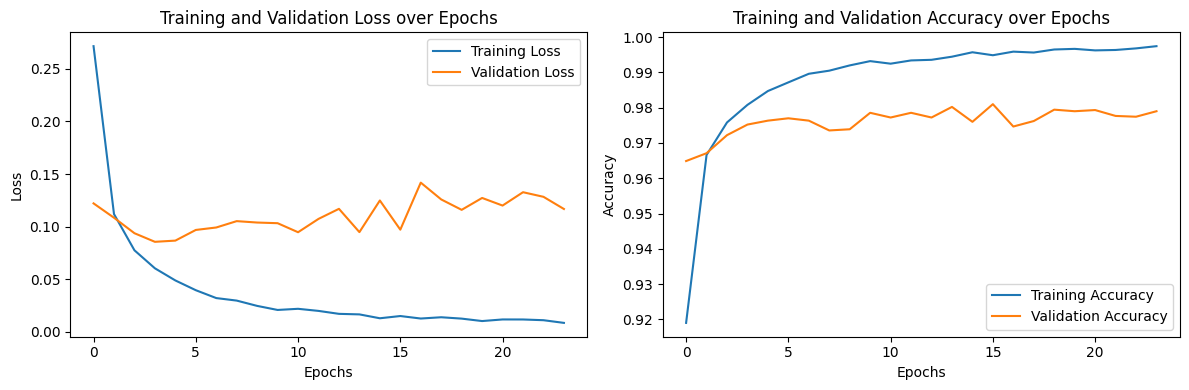

In [13]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the training loss
axs[0].plot(history.history['loss'], label='Training Loss')

# Plotting the validation loss
axs[0].plot(history.history['val_loss'], label='Validation Loss')

# Adding labels and title for loss plot
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].legend()

# Plotting the training accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding labels and title for accuracy plot
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].legend()

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


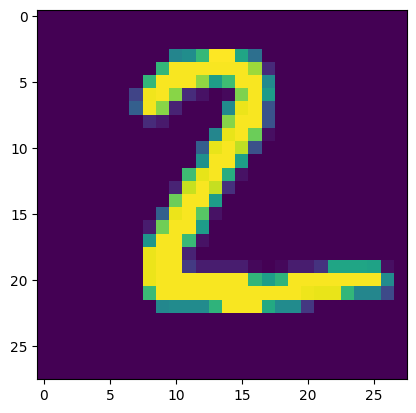

1/1 [==============================] - 0s 16ms/step
The digit in image is: 2


In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_test[1])
plt.show()

print("The digit in image is:",model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)[0])